In [1]:
import pandas as pd
import numpy as np

In [36]:
train1=pd.read_excel('./Data_Train.xlsx')
test1=pd.read_excel('./Test_set.xlsx')
s=pd.read_excel('./Sample_submission.xlsx')
train1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [37]:
train1.iloc[6474, 7],test1.iloc[2660, 7] = '24h 5m','24h 5m'
test1.iloc[2664,7] = '24h 5m'

print(test1.iloc[2664, 7])

24h 5m


In [38]:
train1.iloc[2618, 0] = "Jet Airways Business"
train1.iloc[5439, 0] = "Jet Airways Business"
train1.drop(index = 2924, inplace = True, axis = 0)
train1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [39]:
train1.Route.fillna('DEL → COK',inplace=True)
train1.Total_Stops.fillna('non-stop',inplace=True)
print(train1.isnull().sum().any())

False


In [40]:
train1.Airline.replace('Trujet','SpiceJet',inplace=True)
train1['Airline'].value_counts()

Jet Airways                          3847
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              819
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    7
Vistara Premium economy                 3
Name: Airline, dtype: int64

In [41]:
train = train1.copy()
test = test1.copy()
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,10682,11,Jet Airways,3847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,10682,44,18/05/2019,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10682,5,Delhi,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10682,6,Cochin,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10682,128,DEL → BOM → COK,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,10682,222,18:55,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,10682,1343,19:00,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,10682,367,2h 50m,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10682,5,1 stop,5624,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10682,10,No info,8345,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     3
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [43]:
train['Destination'].replace('New Delhi','Delhi',inplace=True)
test['Destination'].replace('New Delhi','Delhi',inplace=True)

In [44]:
train = pd.DataFrame(data=train.values,columns=train.columns).reset_index().drop('index',axis=1)
test = pd.DataFrame(data=test.values,columns=test.columns).reset_index().drop('index',axis=1)
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [45]:
train['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        2196
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [46]:
train['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2196
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [47]:
train['Total_Stops'].value_counts()
test['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [48]:
main_df = train.append(test,ignore_index=True)
print(train.shape,':',test.shape,';',main_df.shape)

(10682, 11) : (2671, 10) ; (13353, 11)


C:\Users\Acer\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [49]:
df = main_df.copy()

In [50]:
def Total_Stops(val):
  if val == 'non-stop':
    return 0
  else:
    return int(val.split(' ')[0])
  
df['stop_count']=df['Total_Stops'].apply(Total_Stops)
df.head()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,stop_count
0,No info,IndiGo,01:10 22 Mar,24/03/2019,22:20,Delhi,2h 50m,3897,BLR → DEL,Banglore,non-stop,0
1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662,CCU → IXR → BBI → BLR,Kolkata,2 stops,2
2,No info,Jet Airways,04:25 10 Jun,9/06/2019,09:25,Cochin,19h,13882,DEL → LKO → BOM → COK,Delhi,2 stops,2
3,No info,IndiGo,23:30,12/05/2019,18:05,Banglore,5h 25m,6218,CCU → NAG → BLR,Kolkata,1 stop,1
4,No info,IndiGo,21:35,01/03/2019,16:50,Delhi,4h 45m,13302,BLR → NAG → DEL,Banglore,1 stop,1


In [51]:
df['Source2Destination'] = df['Source'] +'-' + df['Destination']

def Dep_Time(val):
  return val.split(':')[0]

def Dep_Time1(val):
  return val.split(':')[1]

def Arrival_Time(val):
  return val.split(':')[0]

def Arrival_Time1(val):
  val2 = val.split(':')[1]
  return val2.split(' ')[0]

df['Dep_Hour'] = df['Dep_Time'].apply(Dep_Time)
df['Dep_Min'] = df['Dep_Time'].apply(Dep_Time1)
df['Arrival_Hour'] = df['Arrival_Time'].apply(Arrival_Time)
df['Arrival_Min'] = df['Arrival_Time'].apply(Arrival_Time1)
df.head()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,stop_count,Source2Destination,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,No info,IndiGo,01:10 22 Mar,24/03/2019,22:20,Delhi,2h 50m,3897,BLR → DEL,Banglore,non-stop,0,Banglore-Delhi,22,20,01,10
1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662,CCU → IXR → BBI → BLR,Kolkata,2 stops,2,Kolkata-Banglore,05,50,13,15
2,No info,Jet Airways,04:25 10 Jun,9/06/2019,09:25,Cochin,19h,13882,DEL → LKO → BOM → COK,Delhi,2 stops,2,Delhi-Cochin,09,25,04,25
3,No info,IndiGo,23:30,12/05/2019,18:05,Banglore,5h 25m,6218,CCU → NAG → BLR,Kolkata,1 stop,1,Kolkata-Banglore,18,05,23,30
4,No info,IndiGo,21:35,01/03/2019,16:50,Delhi,4h 45m,13302,BLR → NAG → DEL,Banglore,1 stop,1,Banglore-Delhi,16,50,21,35


In [52]:
def isweekday(v):
    if v in [5,6]:
        return 0
    else:
        return 1


df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['day']=df['Date_of_Journey'].dt.day.astype(str)
df['month']=df['Date_of_Journey'].dt.month.astype(str)
df['week']=df['Date_of_Journey'].dt.week.astype(str)
df['weekday']=df['Date_of_Journey'].dt.weekday.astype(str)
df['isweekday']=df['Date_of_Journey'].dt.weekday.apply(isweekday)

df.head()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,...,Source2Destination,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,day,month,week,weekday,isweekday
0,No info,IndiGo,01:10 22 Mar,2019-03-24,22:20,Delhi,2h 50m,3897,BLR → DEL,Banglore,...,Banglore-Delhi,22,20,01,10,24,3,12,6,0
1,No info,Air India,13:15,2019-01-05,05:50,Banglore,7h 25m,7662,CCU → IXR → BBI → BLR,Kolkata,...,Kolkata-Banglore,05,50,13,15,5,1,1,5,0
2,No info,Jet Airways,04:25 10 Jun,2019-09-06,09:25,Cochin,19h,13882,DEL → LKO → BOM → COK,Delhi,...,Delhi-Cochin,09,25,04,25,6,9,36,4,1
3,No info,IndiGo,23:30,2019-12-05,18:05,Banglore,5h 25m,6218,CCU → NAG → BLR,Kolkata,...,Kolkata-Banglore,18,05,23,30,5,12,49,3,1
4,No info,IndiGo,21:35,2019-01-03,16:50,Delhi,4h 45m,13302,BLR → NAG → DEL,Banglore,...,Banglore-Delhi,16,50,21,35,3,1,1,3,1


In [53]:
def is_premium(val):
  if val in ['Multiple carriers Premium economy','Jet Airways Business','Vistara Premium economy']:
    return 1
  else:
    return 0
  
df['Is_Premium'] = df['Airline'].apply(is_premium)
df.head()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,...,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,day,month,week,weekday,isweekday,Is_Premium
0,No info,IndiGo,01:10 22 Mar,2019-03-24,22:20,Delhi,2h 50m,3897,BLR → DEL,Banglore,...,22,20,01,10,24,3,12,6,0,0
1,No info,Air India,13:15,2019-01-05,05:50,Banglore,7h 25m,7662,CCU → IXR → BBI → BLR,Kolkata,...,05,50,13,15,5,1,1,5,0,0
2,No info,Jet Airways,04:25 10 Jun,2019-09-06,09:25,Cochin,19h,13882,DEL → LKO → BOM → COK,Delhi,...,09,25,04,25,6,9,36,4,1,0
3,No info,IndiGo,23:30,2019-12-05,18:05,Banglore,5h 25m,6218,CCU → NAG → BLR,Kolkata,...,18,05,23,30,5,12,49,3,1,0
4,No info,IndiGo,21:35,2019-01-03,16:50,Delhi,4h 45m,13302,BLR → NAG → DEL,Banglore,...,16,50,21,35,3,1,1,3,1,0


In [54]:
def time_bins(v):
    if v>='00:00' and v<'06:00':
        return 'Morning'
    elif v>='06:00' and v<'12:00':
        return 'Afternoon'
    elif v>='12:00' and v<'18:00':
        return 'Evening'
    elif v>='18:00' and v<='23:60':
        return 'Night'
    else:
        return 'Else'

df['Arrival_Time_bin'] = df['Arrival_Time'].apply(time_bins)
df['Departure_Time_bin'] = df['Dep_Time'].apply(time_bins)

df.head()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,...,Arrival_Hour,Arrival_Min,day,month,week,weekday,isweekday,Is_Premium,Arrival_Time_bin,Departure_Time_bin
0,No info,IndiGo,01:10 22 Mar,2019-03-24,22:20,Delhi,2h 50m,3897,BLR → DEL,Banglore,...,01,10,24,3,12,6,0,0,Morning,Night
1,No info,Air India,13:15,2019-01-05,05:50,Banglore,7h 25m,7662,CCU → IXR → BBI → BLR,Kolkata,...,13,15,5,1,1,5,0,0,Evening,Morning
2,No info,Jet Airways,04:25 10 Jun,2019-09-06,09:25,Cochin,19h,13882,DEL → LKO → BOM → COK,Delhi,...,04,25,6,9,36,4,1,0,Morning,Afternoon
3,No info,IndiGo,23:30,2019-12-05,18:05,Banglore,5h 25m,6218,CCU → NAG → BLR,Kolkata,...,23,30,5,12,49,3,1,0,Night,Night
4,No info,IndiGo,21:35,2019-01-03,16:50,Delhi,4h 45m,13302,BLR → NAG → DEL,Banglore,...,21,35,3,1,1,3,1,0,Night,Evening


In [55]:
df['Additional_Info'].replace('No Info','No info',inplace=True)
df['Additional_Info'].value_counts()

No info                         10496
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      4
2 Long layover                      1
1 Short layover                     1
Red-eye flight                      1
Name: Additional_Info, dtype: int64

In [56]:
df.iloc[3031,15] = 1
df[df['Additional_Info'] == 'Business class']

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,...,Arrival_Hour,Arrival_Min,day,month,week,weekday,isweekday,Is_Premium,Arrival_Time_bin,Departure_Time_bin
3031,Business class,Jet Airways,12:20,2019-01-03,05:50,Delhi,6h 30m,28097,BLR → BDQ → DEL,Banglore,...,1,20,3,1,1,3,1,0,Evening,Morning
5371,Business class,Jet Airways Business,12:25,2019-01-03,05:45,Delhi,6h 40m,62427,BLR → BOM → DEL,Banglore,...,12,25,3,1,1,3,1,1,Evening,Morning
10363,Business class,Jet Airways Business,14:25,2019-01-03,09:45,Delhi,4h 40m,57209,BLR → MAA → DEL,Banglore,...,14,25,3,1,1,3,1,1,Evening,Afternoon
12484,Business class,Jet Airways Business,13:15,2019-01-03,05:45,Delhi,7h 30m,NaN,BLR → BOM → DEL,Banglore,...,13,15,3,1,1,3,1,1,Evening,Morning


In [57]:
df=pd.get_dummies(df,columns=['Date_of_Journey','Additional_Info','Route', 'Airline', 'Destination', 'Duration',
                              'Source','Source2Destination','Total_Stops','stop_count','Arrival_Time_bin',
                              'Departure_Time_bin','weekday','month','day','week','Dep_Hour',
'Dep_Min','Arrival_Hour','Arrival_Min'],drop_first=True)

df.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [58]:
df.head()

,Price,isweekday,Is_Premium,Date_of_Journey_2019-01-04 00:00:00,Date_of_Journey_2019-01-05 00:00:00,Date_of_Journey_2019-01-06 00:00:00,Date_of_Journey_2019-03-03 00:00:00,Date_of_Journey_2019-03-04 00:00:00,Date_of_Journey_2019-03-05 00:00:00,Date_of_Journey_2019-03-06 00:00:00,...,Arrival_Min_10,Arrival_Min_15,Arrival_Min_20,Arrival_Min_25,Arrival_Min_30,Arrival_Min_35,Arrival_Min_40,Arrival_Min_45,Arrival_Min_50,Arrival_Min_55
0,3897,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,7662,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,13882,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,6218,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,13302,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [64]:
df_train = df[df.Price.isnull() == False]
df_test = df[df.Price.isnull() == True]
print( df_train.shape,' : ',df_test.shape)

(10682, 694)  :  (2671, 694)


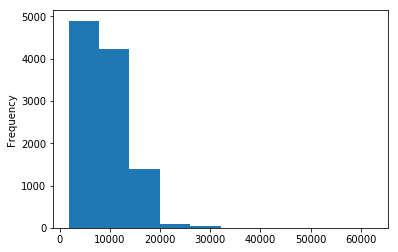

In [65]:
%matplotlib inline
df_train['Price'].plot.hist();

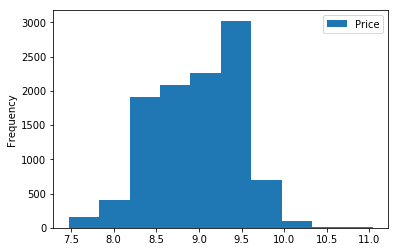

In [66]:
y_logged = np.log1p(df_train['Price'].astype(np.float64))
pd.DataFrame(y_logged).plot.hist();

In [67]:
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import accuracy_score,f1_score,mean_squared_error,mean_squared_log_error

X = df_train.drop('Price',axis=1)

X_train,X_val,y_train,y_val = train_test_split(X,y_logged,random_state =5)

In [69]:
X_train.head()

,isweekday,Is_Premium,Date_of_Journey_2019-01-04 00:00:00,Date_of_Journey_2019-01-05 00:00:00,Date_of_Journey_2019-01-06 00:00:00,Date_of_Journey_2019-03-03 00:00:00,Date_of_Journey_2019-03-04 00:00:00,Date_of_Journey_2019-03-05 00:00:00,Date_of_Journey_2019-03-06 00:00:00,Date_of_Journey_2019-03-15 00:00:00,...,Arrival_Min_10,Arrival_Min_15,Arrival_Min_20,Arrival_Min_25,Arrival_Min_30,Arrival_Min_35,Arrival_Min_40,Arrival_Min_45,Arrival_Min_50,Arrival_Min_55
2326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6327,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9851,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8036,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3170,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [70]:
from sklearn.linear_model import LinearRegression

linreg   = LinearRegression().fit(X_train, y_train)

print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (validation): {:.3f}'.format(linreg.score(X_val, y_val)))

R-squared score (training): 0.900
R-squared score (validation): -1657905547574345465856.000


In [71]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_train,y_train)

print('Training Score : {:.3f}'.format(lasso_reg.score(X_train,y_train)))
print('Testing Score : {:.3f}'.format(lasso_reg.score(X_val,y_val)))

Training Score : 0.000
Testing Score : -0.000


In [72]:
from sklearn.linear_model import Ridge

Ridge_reg = Ridge(alpha=1)
Ridge_reg.fit(X_train,y_train)

print('Training Score : {:.3f}'.format(Ridge_reg.score(X_train,y_train)))
print('Testing Score : {:.3f}'.format(Ridge_reg.score(X_val,y_val)))

Training Score : 0.900
Testing Score : 0.894


In [73]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

print('Training Score : {:.3f}'.format(rf_reg.score(X_train,y_train)))
print('Testing Score : {:.3f}'.format(rf_reg.score(X_val,y_val)))

Training Score : 0.990
Testing Score : 0.947


In [74]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor().fit(X_train,y_train)

print('Training Score : {:.3f}'.format(dt_reg.score(X_train,y_train)))
print('Testing Score : {:.3f}'.format(dt_reg.score(X_val,y_val)))

Training Score : 0.996
Testing Score : 0.910


In [79]:
X_train.head()

,isweekday,Is_Premium,Date_of_Journey_2019-01-04 00:00:00,Date_of_Journey_2019-01-05 00:00:00,Date_of_Journey_2019-01-06 00:00:00,Date_of_Journey_2019-03-03 00:00:00,Date_of_Journey_2019-03-04 00:00:00,Date_of_Journey_2019-03-05 00:00:00,Date_of_Journey_2019-03-06 00:00:00,Date_of_Journey_2019-03-15 00:00:00,...,Arrival_Min_10,Arrival_Min_15,Arrival_Min_20,Arrival_Min_25,Arrival_Min_30,Arrival_Min_35,Arrival_Min_40,Arrival_Min_45,Arrival_Min_50,Arrival_Min_55
2326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6327,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9851,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8036,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3170,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [78]:
df_test.drop('Price',axis=1,inplace=True)
df_test.head()

C:\Users\Acer\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,isweekday,Is_Premium,Date_of_Journey_2019-01-04 00:00:00,Date_of_Journey_2019-01-05 00:00:00,Date_of_Journey_2019-01-06 00:00:00,Date_of_Journey_2019-03-03 00:00:00,Date_of_Journey_2019-03-04 00:00:00,Date_of_Journey_2019-03-05 00:00:00,Date_of_Journey_2019-03-06 00:00:00,Date_of_Journey_2019-03-15 00:00:00,...,Arrival_Min_10,Arrival_Min_15,Arrival_Min_20,Arrival_Min_25,Arrival_Min_30,Arrival_Min_35,Arrival_Min_40,Arrival_Min_45,Arrival_Min_50,Arrival_Min_55
10682,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10683,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10684,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10685,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10686,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [80]:
rf_reg = RandomForestRegressor(n_estimators=100).fit(X,y_logged)

price_pred = rf_reg.predict(df_test)
type(price_pred)

numpy.ndarray

In [82]:
predictions = np.expm1(price_pred) 
predictions[:10]

array([14714.        ,  4226.        , 12897.98440191, 12513.65972833,
        3641.0416702 , 10271.31209949, 12594.68326644,  4826.70297395,
        4288.28649769, 14778.88509172])

In [83]:
submission = pd.DataFrame({'Price':predictions})
submission.head()

,Price
0,14714.000000
1,4226.000000
2,12897.984402
3,12513.659728
4,3641.041670


In [85]:
submission.to_csv('Submissions.csv',index=False)